In [1]:
#考虑一个具有两个隐藏层的神经网络，结构如下：

#一个输入节点 (x)
#第一个隐藏层，包含 2 个 神经元 (h_{1,1}, h_{1,2})，均使用 ReLU 激活函数。
#第二个隐藏层，包含 2 个 神经元 (h_{2,1}, h_{2,2})，均使用 ReLU 激活函数。
#一个输出节点 (y_{pred})，使用 Sigmoid 激活函数。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#计算relu函数
def relu(a):
  return np.maximum(0, a)

In [4]:
#计算sigmoid函数
def sigmoid(a):
  return 1 / (1 + np.exp(-a))

In [5]:
#正向传播，求出y_pred
def forward(w1, w2, w3, b1, b2, b3, x):
  z1 = np.outer(w1, x) + b1 #shape(2,1)
  h1 = relu(z1) # shape(2,1)

  z2 = np.dot(w2, h1) + b2 # shape (2, 1)
  h2 = relu(z2) # shape(2, 1)

  zout = np.dot(w3, h2) + b3 #shape (2,1)
  y_pred = sigmoid(zout).flatten()
  return z1, h1, z2, h2, zout, y_pred

In [6]:
#计算损失函数loss
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

In [7]:
#反向传播，计算梯度
def backward(z1, h1, z2, h2, zout, y_pred, y_true, x):
  dypred = y_pred - y_true
  b3_grad = dypred * (1- y_pred**2) # shape(1,)
  w3_grad = b3_grad * h2.T # shape(2,1)

  dh2 = np.outer(w3.T, b3_grad) #shape (1,2)
  b2_grad = dh2 * (z2>0) #shape (1,2)
  w2_grad = b2_grad* h1 #shape (2,2)

  dh1 = np.dot(w2.T, b2_grad) #shape (2,1)
  b1_grad = dh1 * (z1>0)
  w1_grad = b1_grad * x# shape (2,1)

  return w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad

In [8]:
#更新参数
def update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate):
  w1 -= learning_rate * w1_grad
  w2 -= learning_rate * w2_grad
  w3 -= learning_rate * w3_grad
  b1 -= learning_rate * b1_grad
  b2 -= learning_rate * b2_grad
  b3 -= learning_rate * b3_grad
  return w1, w2, w3, b1, b2, b3

Epoch: 1 loss: [4.5200224e-05] y_pred: [0.5905] w1_grad: [[-0.00130046]
 [-0.        ]] w2_grad: [[ 0.]
 [-0.]] w3_grad: [[-0.         -0.00235322]] b1_grad: [[-0.00086698]
 [-0.        ]] b2_grad: [[ 0.        ]
 [-0.00433488]] b3_grad: [-0.00619269]
Epoch: 11 loss: [3.84759426e-05] y_pred: [0.5912] w1_grad: [[-0.0011994]
 [-0.       ]] w2_grad: [[ 0.]
 [-0.]] w3_grad: [[-0.         -0.00217633]] b1_grad: [[-0.0007996]
 [-0.       ]] b2_grad: [[ 0.        ]
 [-0.00399801]] b3_grad: [-0.00570589]
Epoch: 21 loss: [3.27551812e-05] y_pred: [0.5919] w1_grad: [[-0.00110628]
 [-0.        ]] w2_grad: [[ 0.]
 [-0.]] w3_grad: [[-0.         -0.00201242]] b1_grad: [[-0.00073752]
 [-0.        ]] b2_grad: [[ 0.       ]
 [-0.0036876]] b3_grad: [-0.00525814]
Epoch: 31 loss: [2.78875125e-05] y_pred: [0.5925] w1_grad: [[-0.00102046]
 [-0.        ]] w2_grad: [[ 0.]
 [-0.]] w3_grad: [[-0.         -0.00186061]] b1_grad: [[-0.00068031]
 [-0.        ]] b2_grad: [[ 0.        ]
 [-0.00340153]] b3_grad: [-0.00

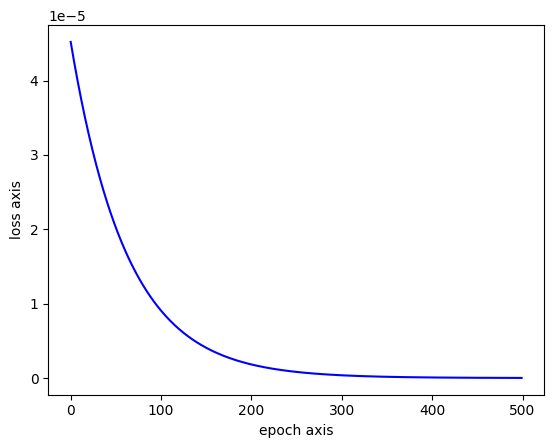

In [9]:
#参数初始化
w1 = np.array([[0.2],
        [-0.3]]) #shape (2,1)

b1 = np.array([[0.1],
        [-0.1]]) #shape (2,1)

w2 = np.array([[0.4, -0.1],
        [0.2, 0.5]]) #shape (2,2)

b2 = np.array([[-0.2],
        [0.3]]) # shape (2,1)

w3 = np.array([[-0.6, 0.7]]) #shape (1,2)

b3 = np.array([[0.1]]) #shape (1,1)

learning_rate = 0.03

x = np.array([1.5])
y_true = np.array([0.6])

epochs = 500
losses = []

for epoch in range(epochs):
  z1, h1, z2, h2, zout, y_pred = forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss)

  w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad = backward(z1, h1, z2, h2, zout, y_pred, y_true, x)
  w1, w2, w3, b1, b2, b3 = update_params(w1, w2, w3, b1, b2, b3, w1_grad, w2_grad, w3_grad, b1_grad, b2_grad, b3_grad, learning_rate)

  if epoch%10 == 0:
    print("Epoch:", epoch + 1,
      f"loss: {loss}",
      f"y_pred: {np.round(y_pred, 4)}",
      f"w1_grad: {w1_grad}",
      f"w2_grad: {w2_grad}",
      f"w3_grad: {w3_grad}",
      f"b1_grad: {b1_grad}",
      f"b2_grad: {b2_grad}",
      f"b3_grad: {b3_grad}"
      )

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()

In [10]:
import torch
import matplotlib.pyplot as plt

In [29]:
#前向传播
def th_forward(w1, w2, w3, b1, b2, b3, x):
  z1 = w1 * x + b1 #shape(2,1)
  h1 = torch.relu(z1) # shape(2,1)

  z2 = torch.matmul(w2, h1) + b2 # shape (2, 1)
  h2 = torch.relu(z2) # shape(2, 1)

  zout = torch.matmul(w3, h2) + b3 #shape (2,1)
  y_pred = torch.sigmoid(zout).flatten()

  return y_pred

In [24]:
#计算损失函数
def compute_loss(y_pred, y_true):
  loss = (y_pred - y_true)**2 /2
  return loss

Epoch: 1 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0. -0.] w3_grad: [ 0. -0.] b1_grad: [-0.  0.] b2_grad: [ 0. -0.] b3_grad: [-0.]
Epoch: 11 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0.  0.] w3_grad: [ 0. -0.] b1_grad: [-0.  0.] b2_grad: [ 0. -0.] b3_grad: [-0.]
Epoch: 21 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0.  0.] w3_grad: [ 0. -0.] b1_grad: [-0.  0.] b2_grad: [ 0. -0.] b3_grad: [-0.]
Epoch: 31 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0.  0.] w3_grad: [ 0. -0.] b1_grad: [-0.  0.] b2_grad: [ 0. -0.] b3_grad: [-0.]
Epoch: 41 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0.  0.] w3_grad: [ 0. -0.] b1_grad: [-0.  0.] b2_grad: [ 0. -0.] b3_grad: [-0.]
Epoch: 51 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0.  0.] w3_grad: [ 0. -0.] b1_grad: [-0.  0.] b2_grad: [ 0. -0.] b3_grad: [-0.]
Epoch: 61 loss: 0.0000 y_pred: 0.59 w1_grad: [-0.  0.] w2_grad: [ 0.  0. -0. 

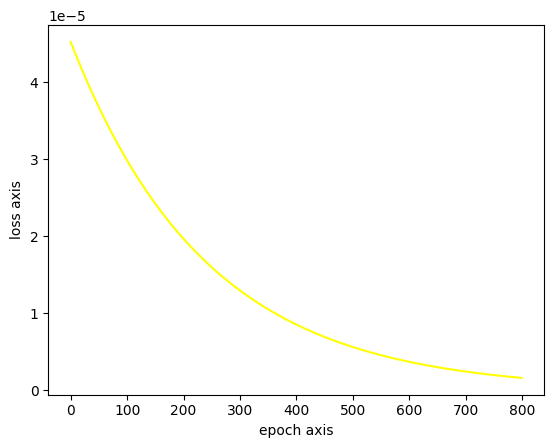

In [34]:
#参数初始化
w1 = torch.tensor([[0.2],
          [-0.3]],requires_grad= True) #shape (2,1)

b1 = torch.tensor([[0.1],
        [-0.1]],requires_grad=True) #shape (2,1)

w2 = torch.tensor([[0.4, -0.1],
        [0.2, 0.5]],requires_grad=True) #shape (2,2)

b2 = torch.tensor([[-0.2],
        [0.3]],requires_grad=True) # shape (2,1)

w3 = torch.tensor([[-0.6, 0.7]],requires_grad=True) #shape (1,2)

b3 = torch.tensor([[0.1]],requires_grad=True) #shape (1,1)

x = torch.tensor([1.5])
y_true = torch.tensor([0.6])

learning_rate = 0.02
epochs = 800

losses = []

for epoch in range(epochs):

  y_pred = th_forward(w1, w2, w3, b1, b2, b3, x)
  loss = compute_loss(y_pred, y_true)
  losses.append(loss.item())

  if w1.grad is not None:
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()

  loss.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    w3 -= learning_rate * w3.grad
    b1 -= learning_rate * b1.grad
    b2 -= learning_rate * b2.grad
    b3 -= learning_rate * b3.grad

  if epoch%10 == 0:
    print(f"Epoch: {epoch + 1}",
      f"loss: {loss.item():0.4f}",
      f"y_pred: {y_pred.item():0.2f}",
      f"w1_grad: {w1.grad.flatten().numpy().round(2)}",
      f"w2_grad: {w2.grad.flatten().numpy().round(2)}",
      f"w3_grad: {w3.grad.flatten().numpy().round(2)}",
      f"b1_grad: {b1.grad.flatten().numpy().round(2)}",
      f"b2_grad: {b2.grad.flatten().numpy().round(2)}",
      f"b3_grad: {b3.grad.flatten().numpy().round(2)}"
      )

plt.plot(range(epochs), losses, "yellow")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()